In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymongo
import requests
from census import Census
# Census API Key
from config import api_key
#c = Census(api_key, year=2016)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Import data from DB for modeling

In [2]:
# Initialize PyMongo to work with MongoDBs
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

In [3]:
results = client.census_DB.census.find()
cluster_data = []
for result in results:
    del result['_id']
    cluster_data.append(result)

In [4]:
cleaned_census_data = pd.DataFrame(cluster_data)
cleaned_census_data

,year,state,state_po,county_name,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Winner
0,2012,MISSOURI,MO,LINN,12668.0,43.0,39028.0,20968.0,13.245974,Republican
1,2012,MISSOURI,MO,HOWELL,40330.0,39.6,34148.0,17763.0,20.300025,Republican
2,2012,MISSOURI,MO,JOHNSON,52964.0,29.7,47960.0,21375.0,15.246205,Republican
3,2012,MISSOURI,MO,LACLEDE,35507.0,39.1,39101.0,19788.0,18.244290,Republican
4,2012,MISSOURI,MO,MARIES,9140.0,43.1,44885.0,21883.0,14.070022,Republican
...,...,...,...,...,...,...,...,...,...,...
9002,2020,MINNESOTA,MN,RENVILLE,14572.0,44.0,58542.0,31243.0,9.422180,Republican
9003,2020,MINNESOTA,MN,ROSEAU,15259.0,41.6,62304.0,31452.0,7.425126,Republican
9004,2020,MINNESOTA,MN,SHERBURNE,96015.0,36.1,88671.0,36022.0,5.158569,Republican
9005,2020,MINNESOTA,MN,STEELE,36710.0,39.2,68172.0,34648.0,7.864342,Republican


# Shape Data for Modeling

In [5]:
test_train_df = cleaned_census_data[(cleaned_census_data['year']==2012) | (cleaned_census_data['year']==2016 )]
test_train_df

,year,state,state_po,county_name,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Winner
0,2012,MISSOURI,MO,LINN,12668.0,43.0,39028.0,20968.0,13.245974,Republican
1,2012,MISSOURI,MO,HOWELL,40330.0,39.6,34148.0,17763.0,20.300025,Republican
2,2012,MISSOURI,MO,JOHNSON,52964.0,29.7,47960.0,21375.0,15.246205,Republican
3,2012,MISSOURI,MO,LACLEDE,35507.0,39.1,39101.0,19788.0,18.244290,Republican
4,2012,MISSOURI,MO,MARIES,9140.0,43.1,44885.0,21883.0,14.070022,Republican
...,...,...,...,...,...,...,...,...,...,...
6001,2016,MICHIGAN,MI,WEXFORD,32829.0,41.9,40417.0,21200.0,18.520211,Republican
6002,2016,MICHIGAN,MI,CLINTON,77245.0,40.4,62646.0,31170.0,11.217555,Republican
6003,2016,MICHIGAN,MI,DICKINSON,25889.0,46.5,43373.0,25136.0,14.369037,Republican
6004,2016,MICHIGAN,MI,HURON,32021.0,48.3,43082.0,24455.0,13.737860,Republican


In [6]:
X = test_train_df.drop(['year','state_po','state', 'county_name','Winner'], axis=1)
X.head()

,Population,Median Age,Household Income,Per Capita Income,Poverty Rate
0,12668.0,43.0,39028.0,20968.0,13.245974
1,40330.0,39.6,34148.0,17763.0,20.300025
2,52964.0,29.7,47960.0,21375.0,15.246205
3,35507.0,39.1,39101.0,19788.0,18.244290
4,9140.0,43.1,44885.0,21883.0,14.070022


In [7]:
y = test_train_df["Winner"].values
y

array(['Republican', 'Republican', 'Republican', ..., 'Republican',
       'Republican', 'Democrat'], dtype=object)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler()
X_scaler.fit(X_train)

StandardScaler()

In [10]:
# Transform the training and testing data by using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Build KNN Model

k: 1, Train/Test Score: 1.000/0.804
k: 3, Train/Test Score: 0.905/0.852
k: 5, Train/Test Score: 0.885/0.862
k: 7, Train/Test Score: 0.876/0.865
k: 9, Train/Test Score: 0.875/0.865
k: 11, Train/Test Score: 0.871/0.864
k: 13, Train/Test Score: 0.869/0.865
k: 15, Train/Test Score: 0.871/0.864
k: 17, Train/Test Score: 0.868/0.862
k: 19, Train/Test Score: 0.869/0.866


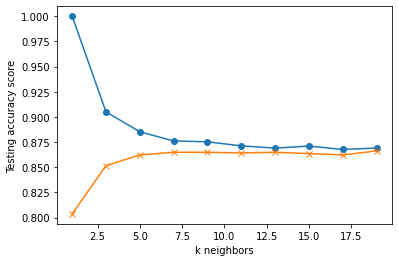

In [11]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

In [12]:
# Note that k: 12 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train_scaled, y_train)
print('k=12 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=12 Test Acc: 0.866


In [13]:
y_true = y_test
y_pred = knn.predict(X_test_scaled)
y_pred

array(['Republican', 'Republican', 'Republican', ..., 'Republican',
       'Republican', 'Republican'], dtype=object)

In [14]:
confusion_matrix(y_true, y_pred)

array([[ 107,  160],
       [  41, 1194]], dtype=int64)

In [15]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

    Democrat       0.72      0.40      0.52       267
  Republican       0.88      0.97      0.92      1235

    accuracy                           0.87      1502
   macro avg       0.80      0.68      0.72      1502
weighted avg       0.85      0.87      0.85      1502



In [16]:
predict_df = cleaned_census_data[(cleaned_census_data['year']==2020)]
predict_df['Winner'].value_counts()

Republican    2509
Democrat       492
Name: Winner, dtype: int64

In [17]:
X_predict_2020 = predict_df.drop(['year','state_po','state','county_name','Winner'], axis=1)
X_predict_2020.head()

,Population,Median Age,Household Income,Per Capita Income,Poverty Rate
6006,55639.0,38.6,57982.0,29804.0,15.086540
6007,218289.0,43.2,61756.0,33751.0,9.042599
6008,25026.0,40.1,34990.0,20074.0,25.221769
6009,22374.0,39.9,51721.0,22626.0,16.782873
6010,57755.0,41.0,48922.0,25457.0,13.586702


In [18]:
#get census by state
def get_census_by_state(year):
    c = Census(api_key, year=year)
    census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E"), 
                         {'for': 'state:*'})
                        # {'for': 'zip code tabulation area:*'})

# Convert to DataFrame
    census_pd = pd.DataFrame(census_data)

# Column Reordering
    census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "NAME": "State"
                                      })

# Add in Poverty Rate (Poverty Count / Population)
    census_pd["Poverty Rate"] = 100 * \
        census_pd["Poverty Count"].astype(
            int) / census_pd["Population"].astype(int)

# Final DataFrame
    census_pd = census_pd[["State", "Population", "Median Age", "Household Income",
                           "Per Capita Income", "Poverty Count", "Poverty Rate"]]


# Visualize
    
    return census_pd

state_census_2020 = get_census_by_state(2020)
state_census_2020

,State,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,Pennsylvania,12794885.0,40.9,63627.0,35518.0,1480430.0,11.570483
1,California,39346023.0,36.7,78672.0,38576.0,4853434.0,12.335259
2,West Virginia,1807426.0,42.7,48037.0,27346.0,300152.0,16.606600
3,Utah,3151239.0,31.1,74197.0,30986.0,283360.0,8.992019
4,New York,19514849.0,39.0,71117.0,40898.0,2581048.0,13.226072
5,District of Columbia,701974.0,34.1,90842.0,58659.0,103391.0,14.728608
6,Alaska,736990.0,34.6,77790.0,37094.0,74369.0,10.090910
7,Florida,21216924.0,42.2,57703.0,32848.0,2772939.0,13.069468
8,South Carolina,5091517.0,39.7,54864.0,30727.0,726470.0,14.268243
9,North Dakota,760394.0,35.2,65315.0,36289.0,77491.0,10.190901


In [19]:
X_scaled_state_2020 = X_scaler.transform(state_census_2020.drop(['State','Poverty Count'], axis=1))
y_pred = knn.predict(X_scaled_state_2020)
pd.Series(y_pred).value_counts()

Democrat    52
dtype: int64